In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math as m
import os
import datetime
import pandas as pd
import timeit

In [2]:
'''Micol'''
path_raw = '/Users/micol/Documents/Imperial/Year4/Master_Project/Measurements_after_realignment' #path with raw spectra files

'''Rachel'''
#path_raw = 'D:/raw_spectra' #path containing all raw spectra
#path_log = 'D:/MSci_Full' #path containing full_log

full_log = '2018-11-28-20181128102247.log' #contains temperature and status of h/c BB target

In [3]:
all_the_files = np.array([i for i in os.listdir(path_raw) if os.path.isfile(os.path.join(path_raw,i)) and i.startswith('IC_raw_spectra_')]) #all files in directory starting with 'IC_raw_spectra'

def read_temperatures_check(directory, filename):
    lines = open(os.path.join(directory, filename)).readlines() #finds all lines in file as string elements in "lines" list
    temp1 = [float(b) for b in (lines[1].split())[6:]]
    tempHBB1 = temp1[0]
    return tempHBB1

delete_files = [f for f in all_the_files if read_temperatures_check(path_raw,f)==0.0] #files where there is no temperature measurement
file_array = [f.strip('IC_raw_spectra.tx') for f in all_the_files if f not in delete_files] #numbers of allowed file lists, in wrong order
file_integers = sorted([int(i) for i in file_array]) #number converted to sorted integers (not naturally done)

files_list = ['IC_raw_spectra_'+str(num)+'.txt' for num in file_integers] #final file list in order

In [4]:
"""retrieving times from files"""

def read_times(directory, filename):
    lines = open(os.path.join(directory, filename)).readlines() #finds all lines in file as string elements in "lines" list
    times = lines[0].split() #retrieve times of beginning of all spectra in a file
    return times

In [5]:
all_times_list = [] #final time list [374x4] (in HH:MM:SS.microsec format)

for f in range(len(files_list)): #go through files_list and extract times
    all_times_list.append(read_times(path_raw, files_list[f]))

flat_list = [item for sublist in all_times_list for item in sublist] #1D list of all times (in HH:MM:SS.microsec format)

spectrum_times = [] #final time list [(374*4)x1] in seconds from midnight format

for i in flat_list: #convert times to seconds format
    time = datetime.datetime.strptime(i, '%H:%M:%S.%f')
    spectrum_times.append((time.microsecond)/1000000 +time.second+time.minute*60+time.hour*3600)

Code up to this point returns: #edit

$\textbf{spectrum_times}$: a list of times of all spectra for which the temperature is not zero

$\textbf{files_list}$: a list of all raw files for which temperature is not zero

In [6]:
time_col_name = 'Time' # name the time column in all subsequent dataframes

In [7]:
def read_file(directory, filename, separator, head='infer'):
    """
    Reads an external file and outputs it as a Pandas Dataframe
    Input: Directory, Filename (Strings)
    Output: Pandas Dataframe
    """
    path=os.path.join(directory, filename)
    dataset = pd.read_csv(path, header = head, sep=separator)
    
    return dataset

In [8]:
# LOG FILE
# Importing file X with features Y Z
x = read_file(path_raw, full_log, separator=',', head=None)

y = x[[1,6,8,9,10,11]] # picking out relevant features

zz = y.loc[y[11] != 0] # removing zero-valued entries in column 11, the ones where it wasnt looking at hot or cold BB

log_file = zz.reset_index()

log_file.columns = ['a','Real Time', 'room_temp', 'hbb_temp','cbb_temp','Time','orientation'] #all the column names; 'f' is some value (0,225,270)
log_file['hc'] = np.nan #add empty column 'hc'
#log_file['temp_avg'] = np.nan #add empty column 'temp_avg'

log_file.loc[log_file['orientation'] == 270, 'hc'] = 'h' #if f=270, 'h'
log_file.loc[log_file['orientation'] == 225, 'hc'] = 'c'
#zz2.loc[zz2['hc'] == 'h', 'temp_avg'] == zz2.loc['hbb_temp']

log_file.drop('a', axis=1, inplace=True)

log_file.loc[100, 'orientation']

270

In [9]:
log_file

,Real Time,room_temp,hbb_temp,cbb_temp,Time,orientation,hc
0,11:43:33,21.33,69.82,27.28,42214,270,h
1,11:43:35,21.33,69.82,27.28,42216,270,h
2,11:43:37,21.32,69.82,27.27,42218,270,h
3,11:43:39,21.33,69.81,27.27,42220,270,h
4,11:43:41,21.32,69.81,27.27,42222,270,h
5,11:43:43,21.32,69.81,27.30,42224,270,h
6,11:43:45,21.32,69.82,27.30,42226,270,h
7,11:43:47,21.33,69.82,27.28,42228,270,h
8,11:43:49,21.32,69.81,27.28,42230,270,h
9,11:43:51,21.33,69.82,27.30,42232,270,h


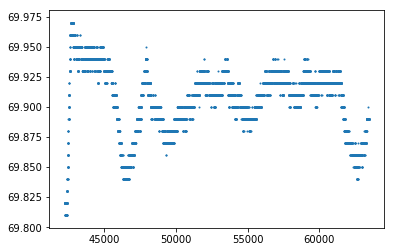

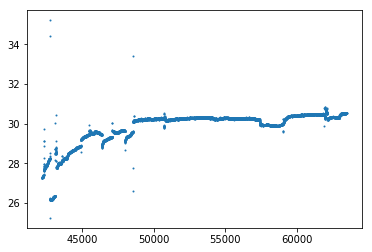

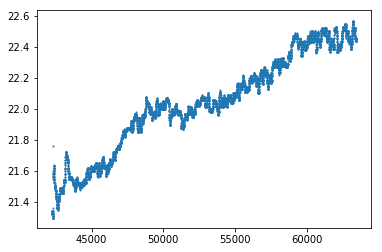

In [10]:
plt.scatter(log_file['Time'], log_file['hbb_temp'], s=1)
plt.show()
plt.scatter(log_file['Time'], log_file['cbb_temp'], s=1)
plt.show()
plt.scatter(log_file['Time'], log_file['room_temp'], s=1)
plt.show()

Something weird happend in begininig of measurements - probably to do with wiring; not with actual data. Therefore we want to discard the wrong data and only analyse the one that looks stable. Take spectrum times between 51000 and 56000

In [11]:
'''insert_row inserts a row into a dataframe after a given index and then reindex all rows in ascending order'''

def insert_row(i, df, line):
    dfA = df.iloc[:i, ]
    dfB = df.iloc[i:, ]
    df = dfA.append(line, sort=True).append(dfB, sort=True).reset_index(drop = True) # Our code differs here
    return df

In [12]:
times = [i for i in spectrum_times if 51000<i and i<56000]
times.sort(reverse = True) #need to insert rows into dataframe in reverse order in order not to get messed up with indices
print(times)

[55992.096, 55978.654, 55965.228, 55947.661, 55934.17, 55920.678, 55907.186, 55888.933, 55875.505, 55862.070999999996, 55848.579, 55829.384, 55815.892, 55802.456, 55788.965, 55769.124, 55755.632, 55742.141, 55728.695, 55711.235, 55697.79, 55684.349, 55670.915, 55651.074, 55637.582, 55624.091, 55610.66, 55593.2, 55579.709, 55566.269, 55552.828, 55532.988, 55519.497, 55506.051, 55492.614, 55473.356, 55459.864, 55446.43, 55432.997, 55413.158, 55399.726, 55386.287, 55372.796, 55353.749, 55340.305, 55326.867, 55313.375, 55293.876, 55280.432, 55266.998, 55253.506, 55236.047, 55222.555, 55209.112, 55195.671, 55177.417, 55163.982, 55150.549, 55137.057, 55118.543, 55105.052, 55091.622, 55078.13, 55059.709, 55046.272, 55032.831, 55019.404, 54999.565, 54986.121, 54972.686, 54959.195, 54939.248, 54925.758, 54912.313, 54898.883, 54880.63, 54867.199, 54853.708, 54840.23, 54821.977, 54808.532, 54795.094, 54781.668, 54762.622, 54749.131, 54735.697, 54722.265, 54704.013, 54690.57, 54677.079, 54663.588,

In [13]:
#scan log_times, and insert spectra at corresponding times, with 'Nan' in the h_c column (by default)
log_times = log_file['Time']
spectrum_index = []

for t in times:
    i=0
    if t > log_times[0]:
        while log_file.at[i, time_col_name] <= t:
            i += 1   
        line = pd.DataFrame([t], columns = [time_col_name])
        log_file = insert_row(i, log_file, line)
    else:
        line = pd.DataFrame([t], columns = [time_col_name])
        log_file = insert_row(i, log_file, line)


In [14]:
log_file[5000:5014]

,Real Time,Time,cbb_temp,hbb_temp,hc,orientation,room_temp
5000,14:32:15,52335.000,30.29,69.91,c,225.0,22.02
5001,14:32:17,52337.000,30.32,69.91,c,225.0,22.03
5002,NaN,52337.079,NaN,NaN,NaN,NaN,NaN
5003,14:32:19,52339.000,30.28,69.91,c,225.0,22.03
5004,14:32:21,52342.000,30.27,69.91,c,225.0,22.03
5005,14:32:23,52343.000,30.29,69.91,c,225.0,22.03
5006,14:32:25,52346.000,30.31,69.91,c,225.0,22.04
5007,14:32:27,52348.000,30.31,69.91,c,225.0,22.04
5008,14:32:29,52350.000,30.27,69.91,c,225.0,22.03
5009,14:32:31,52352.000,30.27,69.91,h,270.0,22.03


In [17]:
hc_list = []
temps_avg = []
temps_std = []

for i in range(log_file.shape[0]-1):
    value = log_file.at[i, 'hc']
    if value != 'c' and value != 'h':
        hot_or_cold = log_file.iloc[i+1]['hc']
        hc_list.append(hot_or_cold) # the spectra are assigned the h_c value of the following time
        if hot_or_cold == 'h':
            temps_avg.append(np.average(log_file.hbb_temp[i+1:i+8]))
            temps_std.append(np.std(log_file.hbb_temp[i+1:i+8]))
        elif hot_or_cold == 'c':
            temps_avg.append(log_file.cbb_temp[i+1])
            temps_std.append(np.std(log_file.cbb_temp[i+1:i+4]))

In [18]:
times.sort() # now they are back in ascending order

hc_and_times = pd.DataFrame(
    {'Spectrum': times,
     'hc': hc_list,
     'temps_avg': temps_avg,
     'temps_std': temps_std
    })

hc_and_times[90:150]

,Spectrum,hc,temps_avg,temps_std
90,52323.592,c,30.280000,1.247219e-02
91,52337.079,c,30.280000,8.164966e-03
92,52356.120,h,NaN,1.421085e-14
93,52369.608,h,69.910000,1.421085e-14
94,52383.035,h,NaN,1.421085e-14
95,52396.523,h,69.910000,1.421085e-14
96,52413.978,h,69.910000,1.421085e-14
97,52427.465,h,NaN,5.000000e-03
98,52440.953,h,69.910000,1.421085e-14
99,52454.378,h,69.910000,1.421085e-14
